# Основы работы с pandas

_За основу взята статья [Введение в pandas: анализ данных на Python](https://khashtamov.com/ru/pandas-introduction/)_

Pandas это высокоуровневая Python библиотека для анализа данных. Она построена поверх более низкоуровневой библиотеки NumPy, которая в свою очередь написана на Си. В экосистеме Python, pandas является наиболее продвинутой и быстроразвивающейся библиотекой для обработки и анализа данных. 

Для работы с pandas его нужно импортировать. Общепринятый стандарт - импортировать pandas под именем `pd`.

In [1]:
import pandas as pd

## Series

Чтобы эффективно работать с pandas, необходимо освоить самые главные структуры данных библиотеки: DataFrame и Series. Без понимания, что они из себя представляют, невозможно в дальнейшем проводить качественный анализ.

Структура/объект Series представляет собой объект, похожий на одномерный массив (питоновский список, например), но отличительной его чертой является наличие ассоциированных меток, т.н. индексов, вдоль каждого элемента из списка. Такая особенность делает его более похожим на ассоциативный массив или словарь в Python.

In [2]:
my_series = pd.Series([5, 6, 7, 8, 9, 10])
my_series

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

В строковом представлении объекта Series (когда мы, например, выводи его на экран, как это сделано выше), индекс находится слева, а сам элемент - справа. Если индекс явно не задан, то pandas автоматически создаёт RangeIndex от 0 до N-1, где N общее количество элементов. Также стоит обратить, что у Series есть тип хранимых элементов, в нашем случае это int64, т.к. мы передали целочисленные значения.

У объекта Series есть атрибуты через которые можно получить список элементов и индексы, это values и index соответственно.

In [3]:
my_series.index

RangeIndex(start=0, stop=6, step=1)

In [4]:
my_series.values

array([ 5,  6,  7,  8,  9, 10])

Доступ к элементам объекта Series возможна по их индексу (вспоминается аналогия со словарем и доступом по ключу).

In [5]:
my_series[4]

np.int64(9)

Индексы можно задавать явно. Причём это не обязательно должны быть числа.

In [6]:
my_series2 = pd.Series([5, 6, 7, 8, 9, 10], index=['a', 'b', 'c', 'd', 'e', 'f'])
my_series2['f']

np.int64(10)

Можно делать выборку по нескольким значениям индекса и осуществлять групповое присваивание.

In [7]:
my_series2[['a', 'b', 'f']]

a     5
b     6
f    10
dtype: int64

In [8]:
my_series2[['a', 'b', 'f']] = 0
my_series2

a    0
b    0
c    7
d    8
e    9
f    0
dtype: int64

Можно фильтровать Series, а также применять математические операции.

In [9]:
my_series2[my_series2 > 0]

c    7
d    8
e    9
dtype: int64

In [10]:
my_series2[my_series2 > 0] * 2

c    14
d    16
e    18
dtype: int64

Так как Series похож на словарь, где ключом является индекс, а значением сам элемент, то Series можно создавать на основе словаря. 

Создадим словарь. При помощи `in` можно проверить, имеется ли ключ в словаре.

In [11]:
dic1 = {'a': 5, 'b': 6, 'c': 7, 'd': 8}
'd' in dic1

True

На основе этого словаря можно создать Series и точно также проверить наличие ключа `'d'`.

In [12]:
my_series3 = pd.Series(dic1)
my_series3

a    5
b    6
c    7
d    8
dtype: int64

In [13]:
'd' in my_series3

True

У объекта Series и его индекса есть атрибут name, задающий имя объекту и индексу соответственно.

In [14]:
my_series3.name = 'numbers'
my_series3.index.name = 'letters'
my_series3

letters
a    5
b    6
c    7
d    8
Name: numbers, dtype: int64

Индекс можно поменять "на лету", присвоив список атрибуту `index` объекта Series

In [15]:
my_series3.index = ['A', 'B', 'C', 'D']
my_series3

A    5
B    6
C    7
D    8
Name: numbers, dtype: int64

Список с новыми индексами по длине должен совпадать с количеством элементов в Series.

### Задание

Найдите в Интернете список городов-миллионников в России и создайте на его основе объект Series. Достаточно ограничиться пятью городами. Индексом сделайте название города, а значением — численность населения. Присвойте имя самому объекту и его индексу. Продемонстрируйте доступ к элементам.

In [16]:
# Ваш код:
input_string = "Москва, Санкт-Петербург, Новосибирск, Екатеринбург, Казань, Нижний Новгород, Челябинск"
input_list = input_string.split(', ')
input_series = pd.Series(input_list)
input_series

0             Москва
1    Санкт-Петербург
2        Новосибирск
3       Екатеринбург
4             Казань
5    Нижний Новгород
6          Челябинск
dtype: object

## DataFrame

Объект DataFrame лучше всего представлять себе в виде обычной таблицы и это правильно, ведь DataFrame является табличной структурой данных. В любой таблице всегда присутствуют строки и столбцы. Столбцами в объекте DataFrame выступают объекты Series, строки которых являются их непосредственными элементами.

DataFrame проще всего сконструировать при помощи питоновского словаря.

In [17]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'China'],
    'population': [17.04, 143.5, 9.5, 1408.3],
    'area': [2724902, 17125191, 207600, 9598962]})
df

,country,population,area
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,China,1408.30,9598962


Чтобы убедиться, что столбец в DataFrame это Series, извлекаем любой:

In [18]:
df['country']

0    Kazakhstan
1        Russia
2       Belarus
3         China
Name: country, dtype: object

In [19]:
type(df['country'])

pandas.core.series.Series

Объект DataFrame имеет 2 индекса: по строкам и по столбцам. Если индекс по строкам явно не задан (например, колонка по которой нужно их строить), то pandas задаёт целочисленный индекс RangeIndex от 0 до N-1, где N это количество строк в таблице.

Вот так можно посмотреть индекс по столбцам. Видно, что элементы индекса - это заголовки столбцов:

In [20]:
df.columns

Index(['country', 'population', 'area'], dtype='object')

Вот автоматически заданный индекс по строкам. В таблице у нас 4 записи (строки), пронумерованные от 0 до 3:

In [21]:
df.index

RangeIndex(start=0, stop=4, step=1)

Индекс по строкам можно задать разными способами, например, при формировании самого объекта DataFrame.

In [22]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'China'],
    'population': [17.04, 146.4, 9.5, 1408.3],
    'area': [2724902, 17125191, 207600, 9598962]
    }, index=['KZ', 'RU', 'BY', 'CN'])
df

,country,population,area
KZ,Kazakhstan,17.04,2724902
RU,Russia,146.40,17125191
BY,Belarus,9.50,207600
CN,China,1408.30,9598962


Можно задать индекс уже после создания DataFrame, "на лету":

In [23]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'China'],
    'population': [17.04, 146.4, 9.5, 1408.3],
    'area': [2724902, 17125191, 207600, 9598962]
    })
df

,country,population,area
0,Kazakhstan,17.04,2724902
1,Russia,146.40,17125191
2,Belarus,9.50,207600
3,China,1408.30,9598962


In [24]:
df.index = ['KZ', 'RU', 'BY', 'CN']
df.index.name = 'Country Code'
df

,country,population,area
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,146.40,17125191
BY,Belarus,9.50,207600
CN,China,1408.30,9598962


Как видно, индексу было задано имя - Country Code. 

Нужно отметить, что объекты Series из DataFrame будут иметь те же индексы, что и объект DataFrame в целом.

In [25]:
df['country']

Country Code
KZ    Kazakhstan
RU        Russia
BY       Belarus
CN         China
Name: country, dtype: object

Доступ к строкам по индексу возможен несколькими способами:
 - .loc - используется одно из заданных значений индекса
 - .iloc - используется порядковый номер (отсчёт начинается с 0)

In [26]:
df.loc['KZ']

country       Kazakhstan
population         17.04
area             2724902
Name: KZ, dtype: object

In [27]:
df.iloc[0]

country       Kazakhstan
population         17.04
area             2724902
Name: KZ, dtype: object

Можно делать выборку по индексу и интересующим колонкам:

In [28]:
df.loc[['KZ', 'RU'], 'population']

Country Code
KZ     17.04
RU    146.40
Name: population, dtype: float64

Как можно заметить, .loc в квадратных скобках принимает 2 аргумента: сначала строковый индекс или множество индексов, а затем индекс колонки.

Поддерживается слайсинг.

In [29]:
df.loc['KZ':'BY', :]

,country,population,area
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,146.40,17125191
BY,Belarus,9.50,207600


Можно фильтровать DataFrame с помощью т.н. булевых массивов:

In [30]:
df[df.population > 10][['country', 'area']]

,country,area
Country Code,,
KZ,Kazakhstan,2724902
RU,Russia,17125191
CN,China,9598962


К столбцам можно обращаться, используя атрибут или нотацию словарей Python, т.е. `df.population` и `df['population']` это одно и то же.

In [31]:
df['population']

Country Code
KZ      17.04
RU     146.40
BY       9.50
CN    1408.30
Name: population, dtype: float64

In [32]:
df.population

Country Code
KZ      17.04
RU     146.40
BY       9.50
CN    1408.30
Name: population, dtype: float64

Имеется возможность при помощи `reset_index()` сбросить текущий индекс по строками и заменить его индексом по умолчанию (целочисленным, начиная с 0). Это может иметь смысл, когда несколько строк были удалены. Однако по умолчанию, старый индекс не удаляется, а сохраняется в новом столбце. Если у индекса было имя, оно становится именем нового столбца. Иначе по умолчанию столбец получает имя "index". Это сделано для того, чтобы предоставить возможность доступа к исходному индексу после операции сброса, если это необходимо. Если требуется удалить старый индекс, нужно использовать параметр `drop=True` при вызове `reset_index()`.

Отметим, что pandas при операциях над DataFrame, возвращает новый объект DataFrame. Исходный набор данных остётся неизвенным.

In [33]:
df1 = df.reset_index()
df1

,Country Code,country,population,area
0,KZ,Kazakhstan,17.04,2724902
1,RU,Russia,146.40,17125191
2,BY,Belarus,9.50,207600
3,CN,China,1408.30,9598962


В секции ниже видно, что мы по-прежнему можем использовать текстовые индексы в `df`, а в `df1` это не работает.

In [34]:
print("df")
try:
    print(df.iloc[0], "\n")
    print(df.loc['KZ'], "\n")
except KeyError as e:
    print(f"Ошибочный ключ {e} в df")

print("df1")
try:
    print(df1.iloc[0], "\n")
    print(df1.loc['KZ'], "\n")
except KeyError as e:
    print(f"Ошибочный ключ {e} в df1")

df
country       Kazakhstan
population         17.04
area             2724902
Name: KZ, dtype: object 

country       Kazakhstan
population         17.04
area             2724902
Name: KZ, dtype: object 

df1
Country Code            KZ
country         Kazakhstan
population           17.04
area               2724902
Name: 0, dtype: object 

Ошибочный ключ 'KZ' в df1


Добавление столбца делается также как добавление нового ключа к словарю.

Добавим новый столбец, в котором население (в миллионах) поделим на площадь страны, получив тем самым плотность:

In [35]:
df['Density of population'] = df['population'] / df['area'] * 1000000
df

,country,population,area,Density of population
Country Code,,,,
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,146.40,17125191,8.548810
BY,Belarus,9.50,207600,45.761079
CN,China,1408.30,9598962,146.713780


Вот так столбец можно удалить:

In [36]:
df.drop(['Density of population'], axis='columns')

,country,population,area
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,146.40,17125191
BY,Belarus,9.50,207600
CN,China,1408.30,9598962


Но при этом создаётся новый DataFrame без удалённого столбца. Исходный DataFrame остаётся неизменным.

In [37]:
df

,country,population,area,Density of population
Country Code,,,,
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,146.40,17125191,8.548810
BY,Belarus,9.50,207600,45.761079
CN,China,1408.30,9598962,146.713780


Переименовывать столбцы нужно через метод rename:

In [38]:
df = df.rename(columns={'Density of population': 'density'})
df

,country,population,area,density
Country Code,,,,
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,146.40,17125191,8.548810
BY,Belarus,9.50,207600,45.761079
CN,China,1408.30,9598962,146.713780


### Задание 

Найдите в Интернете таблицы характеристик ноутбуков и создайте на этой основе DataFrame. Столбцы — характеристики ноутбуков, например тактовая частота, марка процессора и так далее. Столбцов должно быть не менее пяти. Строки — марки ноутбуков. Строк должно быть не менее четырёх. Продемонстрируйте выборку столбцов, строк, а также отдельных элементов.

In [49]:
# Ваш код:
input_string = """Ноутбук MSI Katana 15 HX B14WGK-226XRU < 9S7-1587C1-226 > (Intel Core i7 14650HX, 32 ГБ, 1 Тб SSD, GeForce® RTX 5070 (128 бит), WiFi, Bluetooth, noOS, 15") 
Ноутбук Lenovo Legion 5 16IRX9 < 83DG004DRK > (Intel Core i7 14650HX, 32 ГБ, 1 Тб SSD, GeForce® RTX 4060 (128 бит), WiFi, Bluetooth, noOS, 16")
Ноутбук GIGABYTE Aorus 16X 9SG-43KZC64SD < 9RX6L9SGDSJH0DKZ0U0 > (Intel Core i7 13650HX, 32 ГБ, 1 Тб SSD, GeForce® RTX 4070 (128 бит), WiFi, Bluetooth, noOS, 16")
Ноутбук MSI Sword 17 HX B13VFKG-221XRU < 9S7-17T214-221 > (Intel Core i7 13700HX, 32 ГБ, 1 Тб SSD, GeForce® RTX 4060 (128 бит), WiFi, Bluetooth, noOS, 17") 
Ноутбук ASUS TUF Gaming F15 FX507ZI4-LP041 < 90NR0FV7-M003H0 > (Intel Core i7 12700H, 32 ГБ, 1 Тб SSD, GeForce® RTX 4070 (128 бит), WiFi, Bluetooth, noOS, 15") """

input_list = [(x[:x.index("<") - 1], x[x.index("(") + 1:len(x) - 2]) for x in input_string.split("\n")]
input_list

[('Ноутбук MSI Katana 15 HX B14WGK-226XRU',
  'Intel Core i7 14650HX, 32 ГБ, 1 Тб SSD, GeForce® RTX 5070 (128 бит), WiFi, Bluetooth, noOS, 15"'),
 ('Ноутбук Lenovo Legion 5 16IRX9',
  'Intel Core i7 14650HX, 32 ГБ, 1 Тб SSD, GeForce® RTX 4060 (128 бит), WiFi, Bluetooth, noOS, 16'),
 ('Ноутбук GIGABYTE Aorus 16X 9SG-43KZC64SD',
  'Intel Core i7 13650HX, 32 ГБ, 1 Тб SSD, GeForce® RTX 4070 (128 бит), WiFi, Bluetooth, noOS, 16'),
 ('Ноутбук MSI Sword 17 HX B13VFKG-221XRU',
  'Intel Core i7 13700HX, 32 ГБ, 1 Тб SSD, GeForce® RTX 4060 (128 бит), WiFi, Bluetooth, noOS, 17"'),
 ('Ноутбук ASUS TUF Gaming F15 FX507ZI4-LP041',
  'Intel Core i7 12700H, 32 ГБ, 1 Тб SSD, GeForce® RTX 4070 (128 бит), WiFi, Bluetooth, noOS, 15"')]

In [55]:
laptop_df = pd.DataFrame({
    "name": [x[0] for x in input_list],
    "cpu": [x[1].split(", ")[0] for x in input_list],
    "ram": [x[1].split(", ")[1] for x in input_list],
    "memory": [x[1].split(", ")[2] for x in input_list],
    "gpu": [x[1].split(", ")[3] for x in input_list],
    "size": [x[1].split(", ")[-1] for x in input_list]
})
laptop_df

,name,cpu,ram,memory,gpu,size
0,Ноутбук MSI Katana 15 HX B14WGK-226XRU,Intel Core i7 14650HX,32 ГБ,1 Тб SSD,GeForce® RTX 5070 (128 бит),"15"""
1,Ноутбук Lenovo Legion 5 16IRX9,Intel Core i7 14650HX,32 ГБ,1 Тб SSD,GeForce® RTX 4060 (128 бит),16
2,Ноутбук GIGABYTE Aorus 16X 9SG-43KZC64SD,Intel Core i7 13650HX,32 ГБ,1 Тб SSD,GeForce® RTX 4070 (128 бит),16
3,Ноутбук MSI Sword 17 HX B13VFKG-221XRU,Intel Core i7 13700HX,32 ГБ,1 Тб SSD,GeForce® RTX 4060 (128 бит),"17"""
4,Ноутбук ASUS TUF Gaming F15 FX507ZI4-LP041,Intel Core i7 12700H,32 ГБ,1 Тб SSD,GeForce® RTX 4070 (128 бит),"15"""


## Чтение и запись данных

Pandas поддерживает все самые популярные форматы хранения данных: csv, excel, sql, буфер обмена, html и многое другое.

Чаще всего приходится работать с csv-файлами. Например, чтобы сохранить наш DataFrame со странами, достаточно написать:

In [52]:
df.to_csv('filename.csv')

Метод `.to_csv` передаются различные аргументы (например, символ разделителя между колонками) о которых подробнее можно узнать в официальной документации.

Считать данные из csv-файла и превратить в DataFrame можно функцией read_csv.

In [53]:
df = pd.read_csv('filename.csv', sep=',')

Аргумент `sep` указывает разделитесь столбцов. Существует ещё масса способов сформировать DataFrame из различных источников, но наиболее часто используют CSV, Excel и SQL. Например, с помощью функции `read_sql`, pandas может выполнить SQL запрос и на основе ответа от базы данных сформировать необходимый DataFrame. За более подробной информацией стоит обратиться к официальной документации.

Удалим только что созданный файл, чтобы не засорять файловую систему.

In [54]:
import pathlib
files = ['filename.csv']
for file in files:
    pathlib.Path(file).unlink(missing_ok=True)

### Задание

Созданный в предыдущем задании DataFrame сохраните в виде файла Excel. Откройте этот файл в Excel и добавьте к таблице ещё один столбец и ещё одну строку. Сохраните сделанные изменения и закройте Excel. Теперь загрузите изменённый документ в виде DataFrame pandas и выведите его на экран.

Примечание: pandas работает с файлами Excel через библиотеку openpyxl. Перед началом выполнения этого задания убедитесь, что она установлена.

In [61]:
# Ваш код:
!pip install openpyxl

In [62]:
laptop_df.to_excel("laptops.xlsx", index=False, engine='openpyxl')

In [ ]:
laptop_df = pd.read_excel("laptops.xlsx")

## Отбор заданного числа элементов

Далее для демонстрации приёмов работы с данными мы будем использовать набор данных о пассажирах Титаника, который находится в каталоге `data`.

In [63]:
titanic_df = pd.read_csv('data/titanic.csv')
titanic_df.head()

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


Отбор элементов — это самая простая операция, которую мы фактически уже обсуждали выше. Например, это можно делать при помощи операции слайсинга, так же как и с другими питоновскими хранилищами.

In [64]:
titanic_df[3:10]

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
5,6,"Anderson, Mr Harry",1st,47.00,male,1,0
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1
7,8,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1
9,10,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0


In [65]:
titanic_df[:13:3]

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.0,female,1,1
9,10,"Artagaveytia, Mr Ramon",1st,71.0,male,0,0
12,13,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1,1


Для выбора заданных строк по их порядковым номерам можно также использовать `.iloc`:

In [66]:
titanic_df.iloc[:13:3]

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.0,female,1,1
9,10,"Artagaveytia, Mr Ramon",1st,71.0,male,0,0
12,13,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1,1


### Задание 

Выведите на экран фрагмент набора данных о пассажирах Титаника, начиная со строки, отстоящей от конца на 50 элементов, с шагом 10.

In [70]:
# Ваш код:
titanic_df[-50::10]

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
1263,1264,"Turja, Miss Anna Sofia",3rd,18.0,female,1,1
1273,1274,"Van der Steen, Mr Leo Peter",3rd,28.0,male,0,0
1283,1284,"Vestrom, Miss Hulda Amanda Adolfina",3rd,14.0,female,0,1
1293,1294,"Wilkes, Mrs Ellen",3rd,45.0,female,1,1
1303,1304,"Yasbeck, Mr Antoni",3rd,27.0,male,0,0


## Сортировка

Для сортировки записей в DataFrame по столбцу используется метод `.sort_values()`.

In [71]:
titanic_df.sort_values(by='Age', ascending=True)

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
763,764,"Dean, Miss Elizabeth Gladys (Millvena)",3rd,0.17,female,1,1
751,752,"Danbom, Master Gilbert Sigvard Emanuel",3rd,0.33,male,0,0
544,545,"Richards, Master George Sidney",2nd,0.80,male,1,0
616,617,"Aks, Master Philip",3rd,0.83,male,1,0
358,359,"Caldwell, Master Alden Gates",2nd,0.83,male,1,0
...,...,...,...,...,...,...,...
1300,1301,"Wiseman, Mr Phillippe",3rd,NaN,male,0,0
1302,1303,"Yalsevac, Mr Ivan",3rd,NaN,male,1,0
1305,1306,"Youssef, Mr Gerios",3rd,NaN,male,0,0
1306,1307,"Zabour, Miss Hileni",3rd,NaN,female,0,1


Можно задать сортировку по нескольким столбцам.

In [72]:
titanic_df.sort_values(by=['Sex', 'Age'], ascending=[True, True])

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
763,764,"Dean, Miss Elizabeth Gladys (Millvena)",3rd,0.17,female,1,1
478,479,"LaRoche, Miss Louise",2nd,1.00,female,1,1
893,894,"Johnson, Miss Eleanor Ileen",3rd,1.00,female,1,1
936,937,"Klasen, Miss Gertrud Emilia",3rd,1.50,female,0,1
1188,1189,"Sandstrom, Miss Beatrice Irene",3rd,1.50,female,0,1
...,...,...,...,...,...,...,...
1295,1296,"Willey, Mr Edward",3rd,NaN,male,0,0
1296,1297,"Williams, Mr Howard Hugh",3rd,NaN,male,0,0
1300,1301,"Wiseman, Mr Phillippe",3rd,NaN,male,0,0
1302,1303,"Yalsevac, Mr Ivan",3rd,NaN,male,1,0


### Задание

Выведите на экран 25 первых записей набора данных о пассажирах Титаника, отсортированные так, чтобы сначала были показаны все мужчины, потом женщины, а внутри этих групп пассажиры должны быть упорядочены по увеличению возраста.

In [74]:
# Ваш код:
titanic_df[:25].sort_values(by=["Sex", "Age"], ascending=[False, True])

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
16,17,"Baxter, Mr Quigg Edmond",1st,24.00,male,0,0
21,22,"Birnbaum, Mr Jakob",1st,25.00,male,0,0
22,23,"Bishop, Mr Dickinson H",1st,25.00,male,1,0
20,21,"Behr, Mr Karl Howell",1st,26.00,male,1,0
24,25,"Bjornstrm-Steffansson, Mr Mauritz Hakan",1st,28.00,male,1,0
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
17,18,"Beattie, Mr Thomson",1st,36.00,male,0,0
18,19,"Beckwith, Mr Richard Leonard",1st,37.00,male,1,0
7,8,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0


## Фильтрация

Для фильтрации данных можно использовать булевы маски (массивы логических значений). 

Например, вот так можно построить булеву маску по признаку пола.

In [75]:
titanic_df['Sex']=='female'

0        True
1        True
2       False
3        True
4       False
        ...  
1308    False
1309    False
1310    False
1311    False
1312    False
Name: Sex, Length: 1313, dtype: bool

Применив эту маску к DataFrame мы получим набора данных, содержащей только женщин.

In [76]:
titanic_df[titanic_df['Sex']=='female']

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.0,female,1,1
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.0,female,1,1
...,...,...,...,...,...,...,...
1283,1284,"Vestrom, Miss Hulda Amanda Adolfina",3rd,14.0,female,0,1
1293,1294,"Wilkes, Mrs Ellen",3rd,45.0,female,1,1
1304,1305,"Yasbeck, Mrs Antoni",3rd,15.0,female,1,1
1306,1307,"Zabour, Miss Hileni",3rd,NaN,female,0,1


### Задание

Выведите на экран десять самых старших мужчин, занимавших на Титанике каюты первого класса

In [77]:
# Ваш код:
titanic_df[titanic_df["PClass"] == "1st"].sort_values(by=["Age"], ascending=[False])[:10]

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
9,10,"Artagaveytia, Mr Ramon",1st,71.0,male,0,0
119,120,"Goldschmidt, Mr George B",1st,71.0,male,0,0
72,73,"Crosby, Captain Edward Gifford",1st,70.0,male,0,0
73,74,"Crosby, Mrs Edward Gifford (Catherine Elizabet...",1st,69.0,female,1,1
252,253,"Straus, Mr Isidor",1st,67.0,male,0,0
179,180,"Millet, Mr Francis Davis",1st,65.0,male,0,0
193,194,"Ostby, Mr Engelhart Cornelius",1st,64.0,male,0,0
191,192,"Nicholson, Mr Arthur Ernest",1st,64.0,male,0,0
67,68,"Compton, Mrs Alexander Taylor (Mary Eliza Inge...",1st,64.0,female,1,1
103,104,"Fortune, Mr Mark",1st,64.0,male,0,0


## Группировка и агрегирование

В pandas за группировку отвечает метод `.groupby`. При группировке все строки таблицы разбиваются на группы, так чтобы в каждой группе находились значения с одинаковой величиной в том столбце, по которому производится группировка.

Например, вот так можно сгруппировать записи по признаку выжил пассажир или нет.

In [78]:
titanic_df.groupby(['Survived'])

Результат группировки к объекту DataGrame - объект DataFrameGroupBy. Чтобы снова получить DataFrame нужно к этому объекту применить одну из операций агрегирования. 

Операция агрегирования - это функция, которая на вход получает массив значений, принадлежащих группе, а на выходе выдаёт одно значение. Например, операция `.count()` подсчитывает число элементов в группе.

In [79]:
titanic_df.groupby(['Survived']).count()

,PassengerID,Name,PClass,Age,Sex,SexCode
Survived,,,,,,
0,863,863,863,443,863,863
1,450,450,450,313,450,450


Отметим, что подсчитанное число значений во всех столбцах кроме Age равно 863 и 450. Значений в столбце Age меньше из-за того, что в нём некоторые значения отсутствуют, т.е. имеют значения NaN или NULL. Если предварительно удалить записи с отсутствующим значениями все числа будут одинаковыми.

In [80]:
titanic_df.dropna().groupby(['Survived']).count()

,PassengerID,Name,PClass,Age,Sex,SexCode
Survived,,,,,,
0,443,443,443,443,443,443
1,313,313,313,313,313,313


Можно выполнять многоуровневые группировки. Например, подсчитаем, сколько выжило мужчин и женщин. И подсчитаем количество элементов в каждой группе по столбцу `'PassengerID'`.

In [81]:
titanic_df.groupby(['Sex', 'Survived'])['PassengerID'].count()

Sex     Survived
female  0           154
        1           308
male    0           709
        1           142
Name: PassengerID, dtype: int64

Ещё пример. Подсчитаем выживших, занимающих каюты разноых классов, столбец `'PClass'`:

In [ ]:
titanic_df.groupby(['PClass', 'Survived'])['PassengerID'].count()

### Задание

Найдите в документации pandas описание метода `.agg()`, которая позволяет применить сразу несколько функций агрегации. Используя этот метод, вычислите средний,  медианный, минимальный и максимальный возраста пассажиров кают разных классов. Перед выполнением группировки и агрегации удалите из набора данных записи, в которых имеются пропущенные записи. Найдите самостоятельно, как это сделать.

In [83]:
# Ваш код:
titanic_df.dropna().groupby(["PClass"])['Age'].agg(["mean", "median", "min", "max"])

,mean,median,min,max
PClass,,,,
1st,39.667788,39.5,0.92,71.0
2nd,28.300142,28.0,0.80,71.0
3rd,25.208585,24.0,0.17,65.0


## Сводные таблицы

Сводная таблица (pivot table) - это своего рода двумерная группировка и агрегация. 

Рассмотрим пример. В таблице пассажиров Титаника в столбце 'Sex' чередуются значения 'male' и 'female', а в столбце 'PClass' - типы кают по классам обслуживания: '1st', '2nd' и '3rd'. Зададимся вопросом: сколько женщин занимали каюты первого, второго и третьего класса и сколько кают разных классов занимали мужчины. Ответ на этот вопрос даёт сводная таблица. 

Для построения сводной таблицы нужно рассмотреть сгруппировать записи по всем возможным комбинациям, которые можно встретить в столбцах 'Sex' и 'PClass': ('female', '1st'), ('female', '2nd'), ('female', '3rd'), ('male', '1st'), ('male', '2nd'), ('male', '3rd'). Затем нужно применить операцию агрегации к значениям в одном из столбцов собранных записей. В нашем примере мы хотим просто подсчитать количество людей. Можно взять любой столбец, но только такой, в котором не было бы пропущенных значения. Подойдёт 'PassengerID'.

In [84]:
pvt = titanic_df.pivot_table(index=['Sex'], columns=['PClass'], values='PassengerID', aggfunc='count')
pvt

PClass,*,1st,2nd,3rd
Sex,,,,
female,NaN,143.0,107.0,212.0
male,1.0,179.0,172.0,499.0


Мы получили новый DataFrame в котором индекс по строкам - это пол, а именами колонок стали значения из столбца 'PClass'.

Вот так можно получить количество женщин в каютах первого класса:

In [85]:
pvt.loc['female']['1st']

np.float64(143.0)

### Задание

Найдите информацию о том, как работает метод `.apply()`. Напишите функцию, которая из полного имени пассажира, см. столбец 'Name', выделяет имя, т.е. самую первую часть полного имени до запятой. Примените эту функцию к столбцу 'Name' и добавьте к набору данных новый столбец с названием 'FirstName'. Далее постройте сводную таблицу, в которой было бы подсчитано количество мужчин и женщин с такими именами. Перед выводом на экран удалите из этой таблицы строки с именами, которые встречаются только у мужчин или только у женщин.

In [86]:
# Ваш код:
first_names = titanic_df["Name"].apply(lambda x: x.split(", ")[0])
first_names

0           Allen
1         Allison
2         Allison
3         Allison
4         Allison
          ...    
1308     Zakarian
1309     Zakarian
1310        Zenni
1311      Lievens
1312    Zimmerman
Name: Name, Length: 1313, dtype: object

In [88]:
titanic_df["FirstName"] = first_names

In [89]:
titanic_df

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode,FirstName
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,Allen
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1,Allison
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0,Allison
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1,Allison
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0,Allison
...,...,...,...,...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0,Zakarian
1309,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0,Zakarian
1310,1311,"Zenni, Mr Philip",3rd,22.00,male,0,0,Zenni
1311,1312,"Lievens, Mr Rene",3rd,24.00,male,0,0,Lievens


## Анализ временных рядов

В pandas очень удобно анализировать временные ряды. Примеры ниже будут проиллюстрированы на графике цен на акции корпорации Apple за 5 лет по дням. Файл находится в папке `data`.

Считаем файл и сформируем DataFrame с DatetimeIndex по колонке Date, отсортируем новый индекс в правильном порядке для работы с выборками. Если колонка имеет формат даты и времени отличный от ISO8601, то для правильного перевода строки в нужный тип, можно использовать метод `pandas.to_datetime`.

In [90]:
apple_df = pd.read_csv('data/apple.csv', index_col='Date', parse_dates=True)
apple_df = apple_df.sort_index()
apple_df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-02-23,515.079987,517.830009,509.499992,516.389977,142006900,66.903253
2012-02-24,519.669998,522.899979,518.640015,522.409981,103768000,67.683203
2012-02-27,521.309982,528.500000,516.280014,525.760017,136895500,68.117232
2012-02-28,527.960014,535.410011,525.850006,535.410011,150096800,69.367481
2012-02-29,541.560005,547.610023,535.700005,542.440025,238002800,70.278286


In [91]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-02-23 to 2017-02-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


Когда индекс задан в виде дат, можно вот отбирать данные по годам и месяцам:

In [92]:
apple_df.loc['2012']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-02-23,515.079987,517.830009,509.499992,516.389977,142006900,66.903253
2012-02-24,519.669998,522.899979,518.640015,522.409981,103768000,67.683203
2012-02-27,521.309982,528.500000,516.280014,525.760017,136895500,68.117232
2012-02-28,527.960014,535.410011,525.850006,535.410011,150096800,69.367481
2012-02-29,541.560005,547.610023,535.700005,542.440025,238002800,70.278286
...,...,...,...,...,...,...
2012-12-24,520.350014,524.250023,518.709976,520.169983,43938300,67.991470
2012-12-26,519.000023,519.460007,511.120003,512.999992,75609100,67.054280
2012-12-27,513.539978,516.250000,504.659988,515.060013,113780100,67.323545


In [93]:
apple_df.loc['2012-02']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-02-23,515.079987,517.830009,509.499992,516.389977,142006900,66.903253
2012-02-24,519.669998,522.899979,518.640015,522.409981,103768000,67.683203
2012-02-27,521.309982,528.500000,516.280014,525.760017,136895500,68.117232
2012-02-28,527.960014,535.410011,525.850006,535.410011,150096800,69.367481
2012-02-29,541.560005,547.610023,535.700005,542.440025,238002800,70.278286


In [94]:
apple_df.loc['2012-Feb']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-02-23,515.079987,517.830009,509.499992,516.389977,142006900,66.903253
2012-02-24,519.669998,522.899979,518.640015,522.409981,103768000,67.683203
2012-02-27,521.309982,528.500000,516.280014,525.760017,136895500,68.117232
2012-02-28,527.960014,535.410011,525.850006,535.410011,150096800,69.367481
2012-02-29,541.560005,547.610023,535.700005,542.440025,238002800,70.278286


Получим среднюю цену акции за февраль 2012 года (mean) на закрытии (Close):

In [95]:
apple_df.loc['2012-Feb', 'Close'].mean()

np.float64(528.4820022)

Среднее за промежуток с февраля 2012 по февраль 2015:

In [96]:
apple_df.loc['2012-Feb':'2015-Feb', 'Close'].mean()

np.float64(430.4396831701847)

Чтобы задать гранулярность, отличную от года или месяца потребуется выполнить ресемплинг данных. Вот так можно вычислить среднее по неделям.

In [97]:
apple_df.loc['2012-Feb':'2012-Jun', 'Close'].resample('W').mean()

Date
2012-02-26    519.399979
2012-03-04    538.652008
2012-03-11    536.254004
2012-03-18    576.161993
2012-03-25    600.990001
2012-04-01    609.698003
2012-04-08    626.484993
2012-04-15    623.773999
2012-04-22    591.718002
2012-04-29    590.536005
2012-05-06    579.831995
2012-05-13    568.814001
2012-05-20    543.593996
2012-05-27    563.283995
2012-06-03    572.539994
2012-06-10    570.124002
2012-06-17    573.029991
2012-06-24    583.739993
2012-07-01    574.070004
Freq: W-SUN, Name: Close, dtype: float64

### Задание

Вычислите средне значение максимальной дневной цены акций Apple за 2017 год.

In [98]:
# Ваш код:
apple_df.loc['2017', "High"].mean()

np.float64(125.64771408571427)

## Визуализация данных в pandas

Для визуального анализа данных pandas использует библиотеку matplotlib, но имеет собственный методы, которые переадресуются функциям matplotlib.

Простейший пример: график цены закрытия в промежутке между 2012 и 2017.

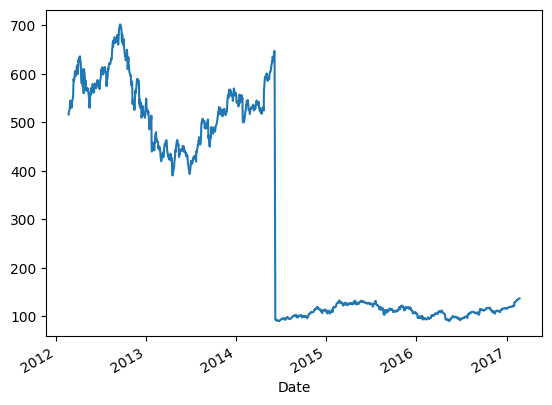

In [99]:
new_sample_df = apple_df.loc['2012-Feb':'2017-Feb', 'Close']
new_sample_df.plot();

По оси X, если не задано явно, всегда будет индекс. По оси Y в нашем случае цена закрытия.

### Задание

Найдите самостоятельно информацию о построении гистограмм в pandas и постройте гистограмму максимальных дневных цен акций Apple за период от 2015 по 2020 годы. Задайте количество столбцов гистограммы равным 100.

<Axes: >

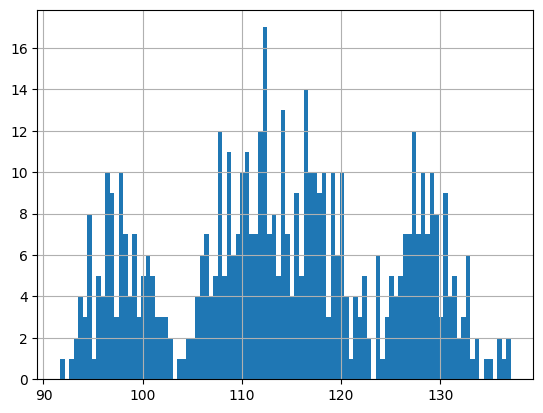

In [105]:
# Ваш код:
apple_df.loc['2015':'2020', "High"].hist(bins=100)